<a href="https://colab.research.google.com/github/SudhirSaxena/Spark-Program/blob/master/Copy_of_stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


We will be specifying start and end dates and we will retrieve the stock data between these dates for the various car companies.

In [ ]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)

Using yahoo api to get the data(reading the data).

In [ ]:
tesla_stock_data = web.DataReader("TSLA","yahoo",start,end)
ford_stock_data = web.DataReader("F","yahoo",start,end)
generalmotors_stock_data = web.DataReader("GM","yahoo",start,end)

In [ ]:
tesla_stock_data.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


In [ ]:
ford_stock_data.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.836860
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.956559
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.160754
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.245250
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.308619


In [ ]:
generalmotors_stock_data.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712


From the retrieved stock data we can see that we have the opening price,closing price,highest price,lowest price of the stock each day between the start and end time duration.

Volume is the volume of stock traded each day.

Now what we gonna do is create the linear plot of the opening prices and closing prices of the stocks.

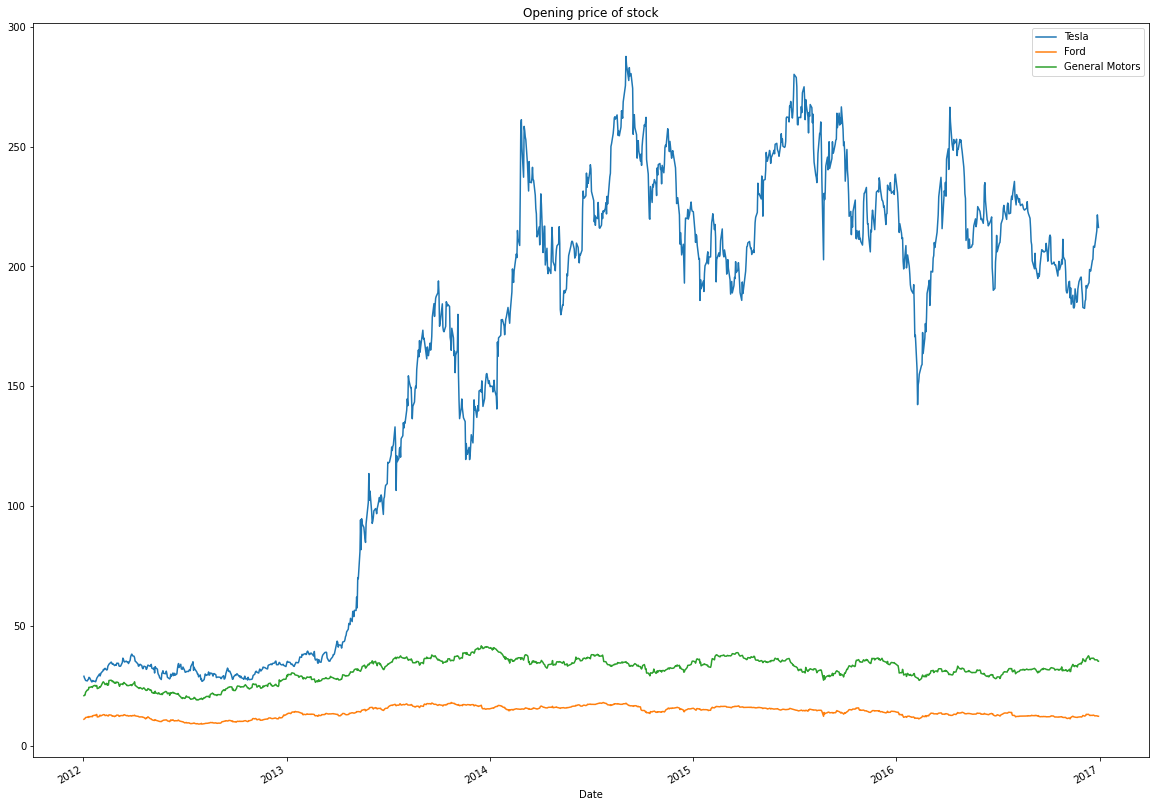

In [ ]:
tesla_stock_data["Open"].plot(label = "Tesla",figsize = (20,15),title = "Opening price of stock")
ford_stock_data["Open"].plot(label = "Ford")
generalmotors_stock_data["Open"].plot(label = "General Motors")
plt.legend();

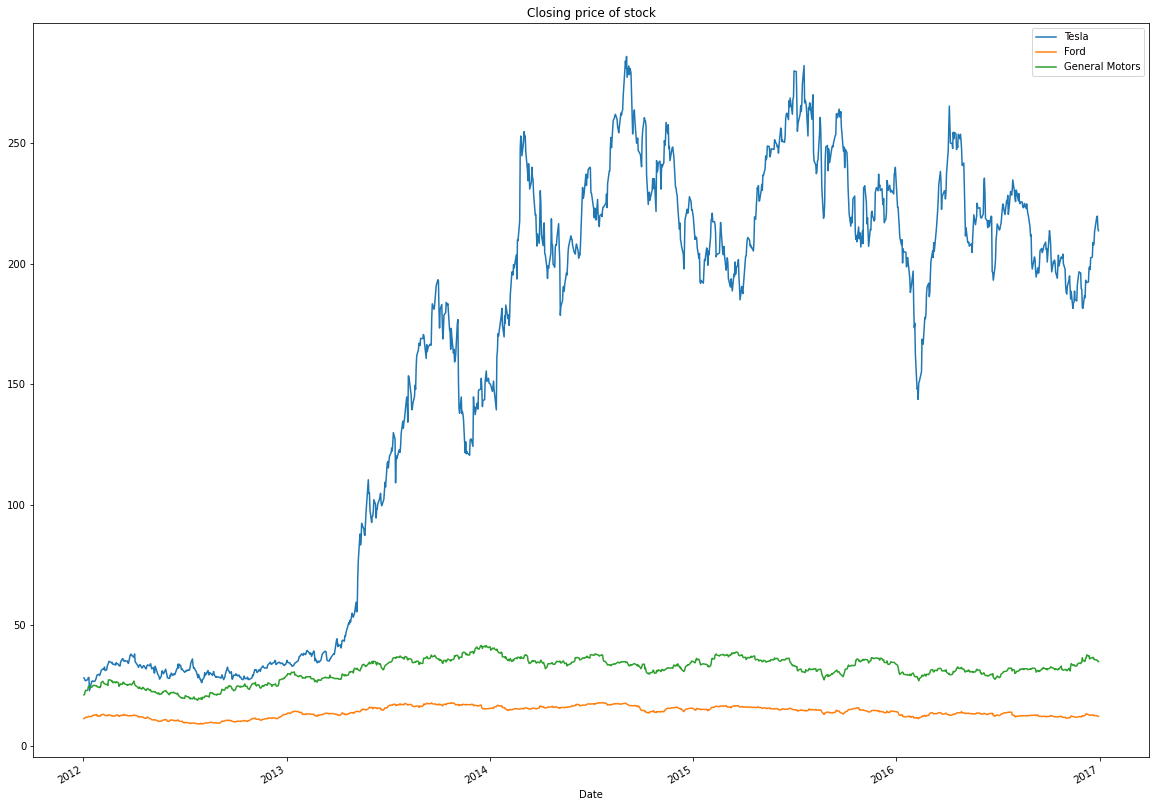

In [ ]:
tesla_stock_data["Close"].plot(label = "Tesla",figsize = (20,15),title = "Closing price of stock")
ford_stock_data["Close"].plot(label = "Ford")
generalmotors_stock_data["Close"].plot(label = "General Motors")
plt.legend();

Now what we gonna see is volume of stock traded each day.

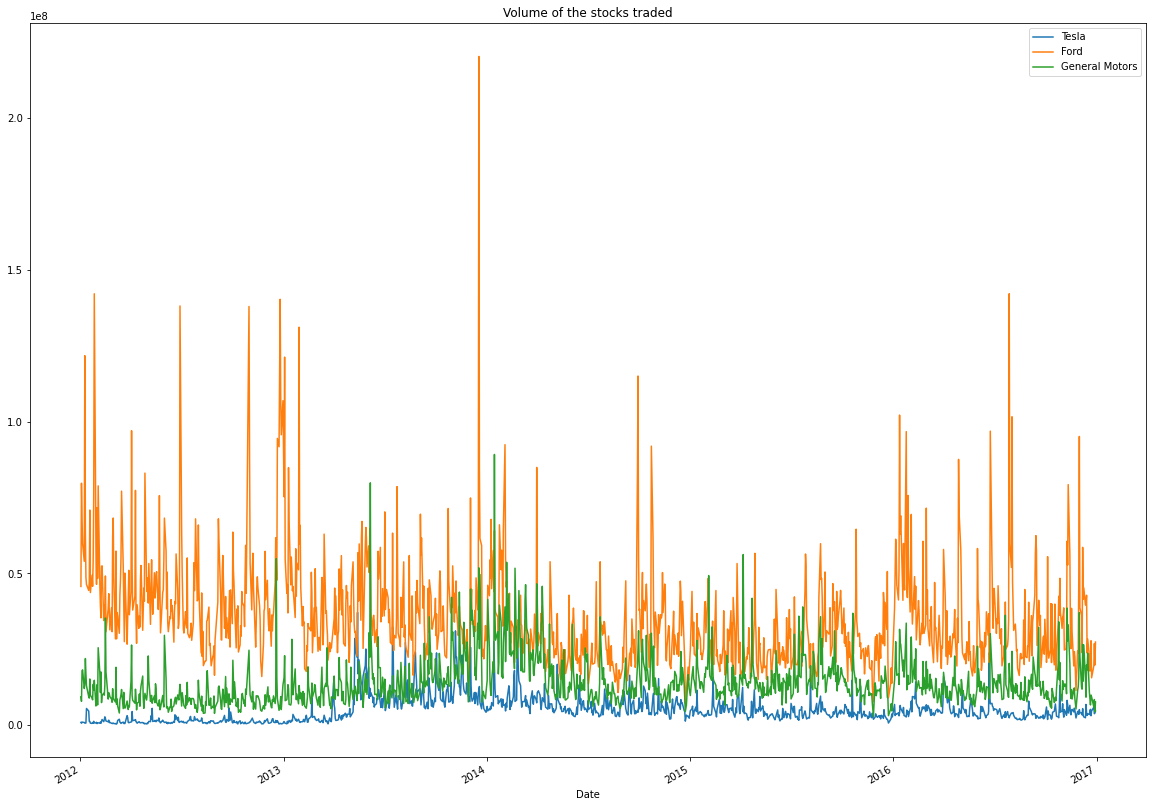

In [ ]:
tesla_stock_data["Volume"].plot(label = "Tesla",figsize = (20,15),title = "Volume of the stocks traded")
ford_stock_data["Volume"].plot(label = "Ford")
generalmotors_stock_data["Volume"].plot(label = "General Motors")
plt.legend();

One inference which we can draw from this plot is that tesla which has really a smooth plot as compared to ford and general motors has always been a much ore valuable company as compared to other two.

On the other hand to really understand this we have to look at the market cap of the company not just stock price and for that what we gonna do is multiply the total stocks traded and the oprning price to calculate the total money traded.

From the above plot of volume of stock traded we can see that ford data have really big spikes(there is lot of irregularity in the volume of stock traded) and some where around 2014 starting there is a preety big spike which certainly specifies that ford must have come out with some really good policy or certain other thing which led to enormous trading of stock.

From the general motors stock data we can see that it is irregular but not as ford data yet it have spikes at some datetime.

Tesla volume traded data is quite smooth and we can see that from 2012 to 2017 there are only a few spikes that too not much.

These type of plot can really help us a lot in gaining insights from data.

In [ ]:
tesla_stock_data["Total money traded"] = tesla_stock_data["Open"]*tesla_stock_data["Volume"]
ford_stock_data["Total money traded"] = ford_stock_data["Open"]*ford_stock_data["Volume"]
generalmotors_stock_data["Total money traded"] = generalmotors_stock_data["Open"]*generalmotors_stock_data["Volume"]

In [ ]:
tesla_stock_data.head(5)

,High,Low,Open,Close,Volume,Adj Close,Total money traded
Date,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07


In [ ]:
ford_stock_data.head(5)

,High,Low,Open,Close,Volume,Adj Close,Total money traded
Date,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.836860,5.028089e+08
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.956559,8.889359e+08
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.160754,7.690521e+08
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.245250,7.025298e+08
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.308619,6.386011e+08


In [ ]:
generalmotors_stock_data.head(5)

,High,Low,Open,Close,Volume,Adj Close,Total money traded
Date,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352,1.941627e+08
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853,1.653835e+08
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161,3.772807e+08
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915,4.059000e+08
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712,2.803604e+08


Plotting the total money traded by the companies.

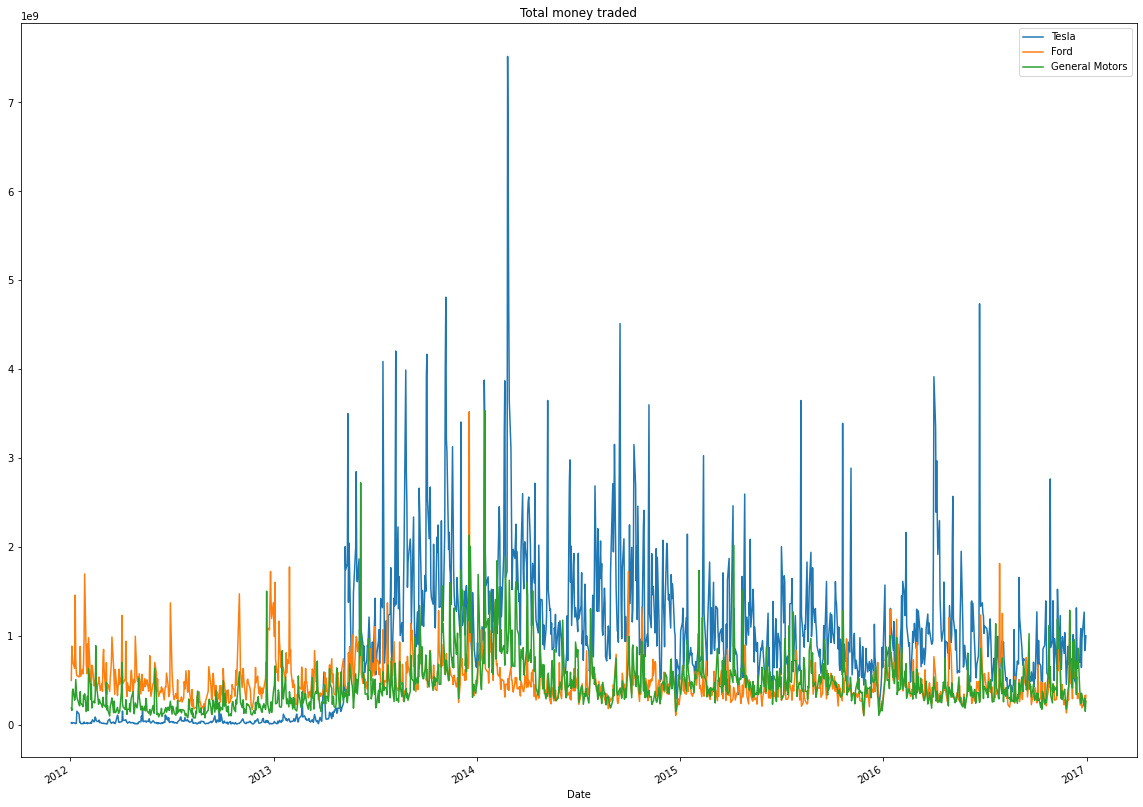

In [ ]:
tesla_stock_data["Total money traded"].plot(label = "Tesla",figsize = (20,15),title = "Total money traded")
ford_stock_data["Total money traded"].plot(label = "Ford")
generalmotors_stock_data["Total money traded"].plot(label = "General Motors")
plt.legend();

From the above plot we can see that huge amount of money has been traded for the tesla from mid of 2013 to last of 2014.

Always it to better to calculate the total money traded than the total volume of stock traded because different company have different stock prices.

We can take the opening price of the day or say more appropriately the average price(or can come up with some other good technique to claculate the stable stock price of the stock on the day) of day to calculate the total money traded by the company that day.

We can always use the argmax to find the date on which the maximum activity happened.

In [ ]:
tesla_stock_data["Total money traded"].max()

7516791000.0

In [ ]:
tesla_stock_data[tesla_stock_data["Total money traded"] == 7516791000.0]

,High,Low,Open,Close,Volume,Adj Close,Total money traded
Date,,,,,,,
2014-02-25,259.200012,228.449997,230.0,248.0,32681700,248.0,7.516791e+09


We can google it to find what actually happended around the days which led to enormous stock trading. 

We can always use this to study the stock data so that we can know what are the factors that influence the stock price.

Now plotting the moving averages of the opening prices of the company.

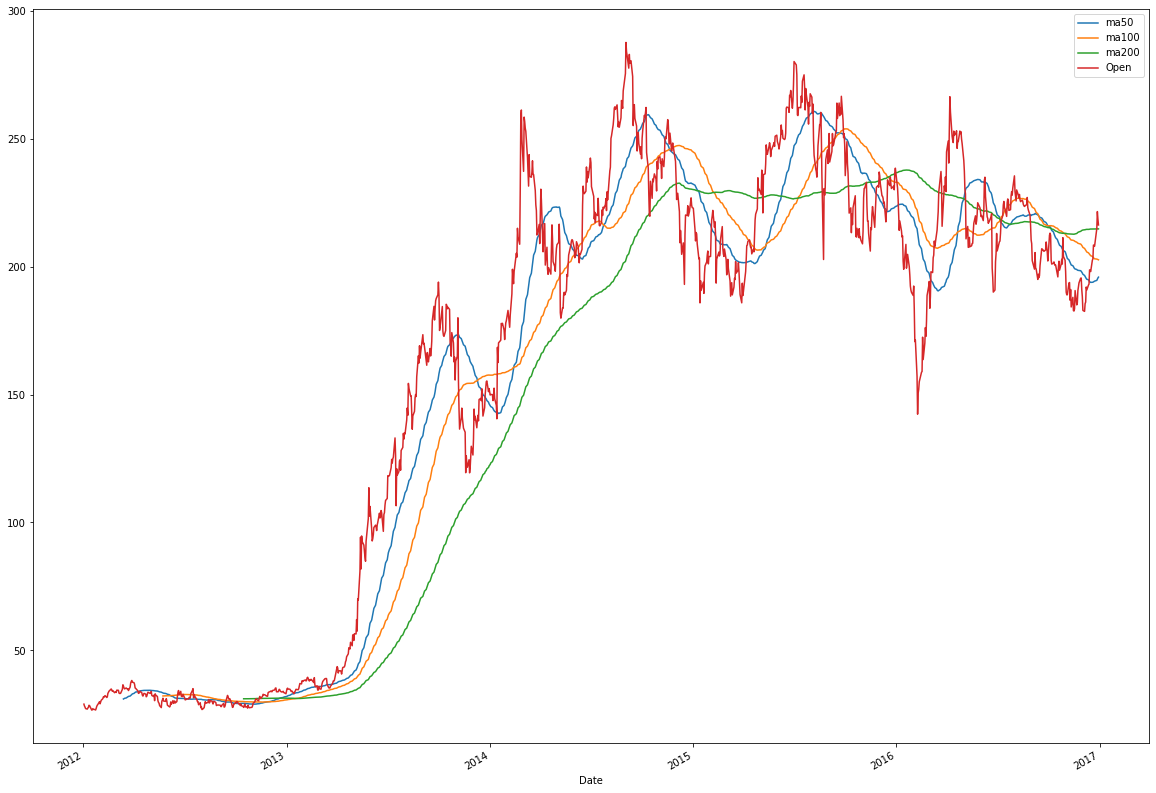

In [ ]:
tesla_stock_data["ma50"] = tesla_stock_data["Open"].rolling(50).mean()
tesla_stock_data["ma100"] = tesla_stock_data["Open"].rolling(100).mean()
tesla_stock_data["ma200"] = tesla_stock_data["Open"].rolling(200).mean()
tesla_stock_data[["ma50","ma100","ma200","Open"]].plot(figsize = (20,15))
plt.legend();

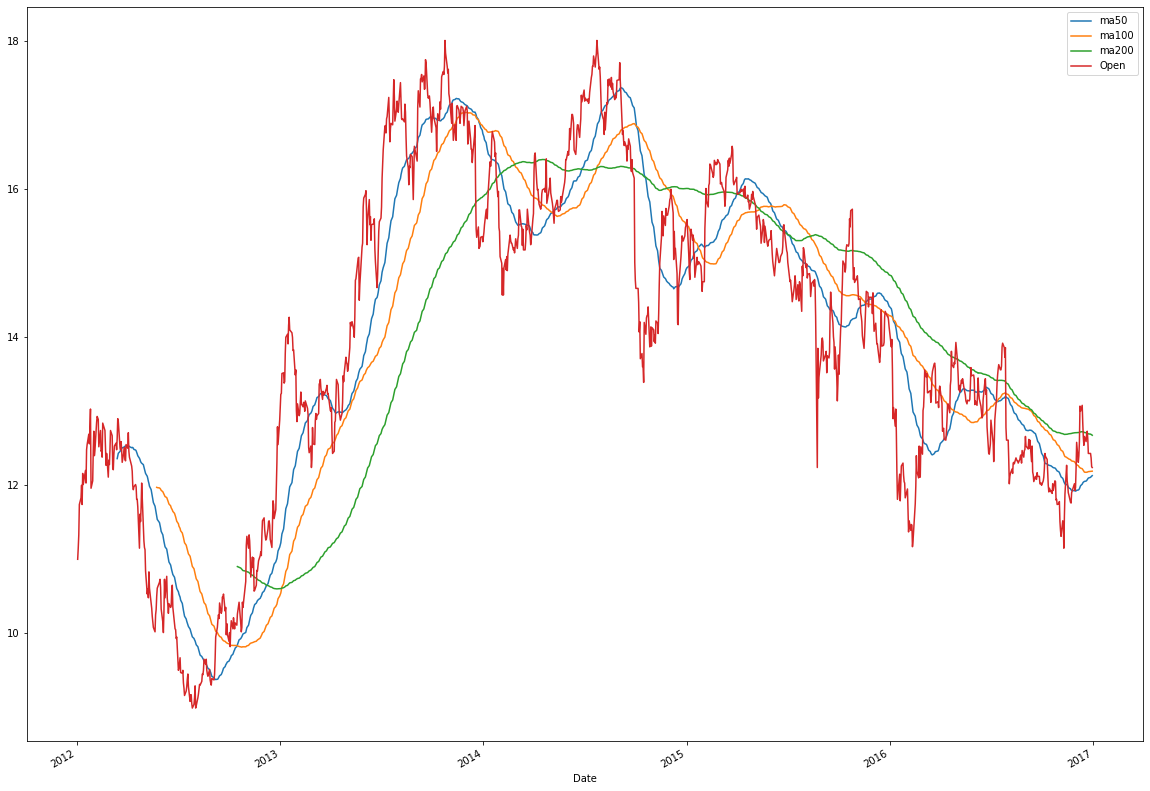

In [ ]:
ford_stock_data["ma50"] = ford_stock_data["Open"].rolling(50).mean()
ford_stock_data["ma100"] = ford_stock_data["Open"].rolling(100).mean()
ford_stock_data["ma200"] = ford_stock_data["Open"].rolling(200).mean()
ford_stock_data[["ma50","ma100","ma200","Open"]].plot(figsize = (20,15))
plt.legend();

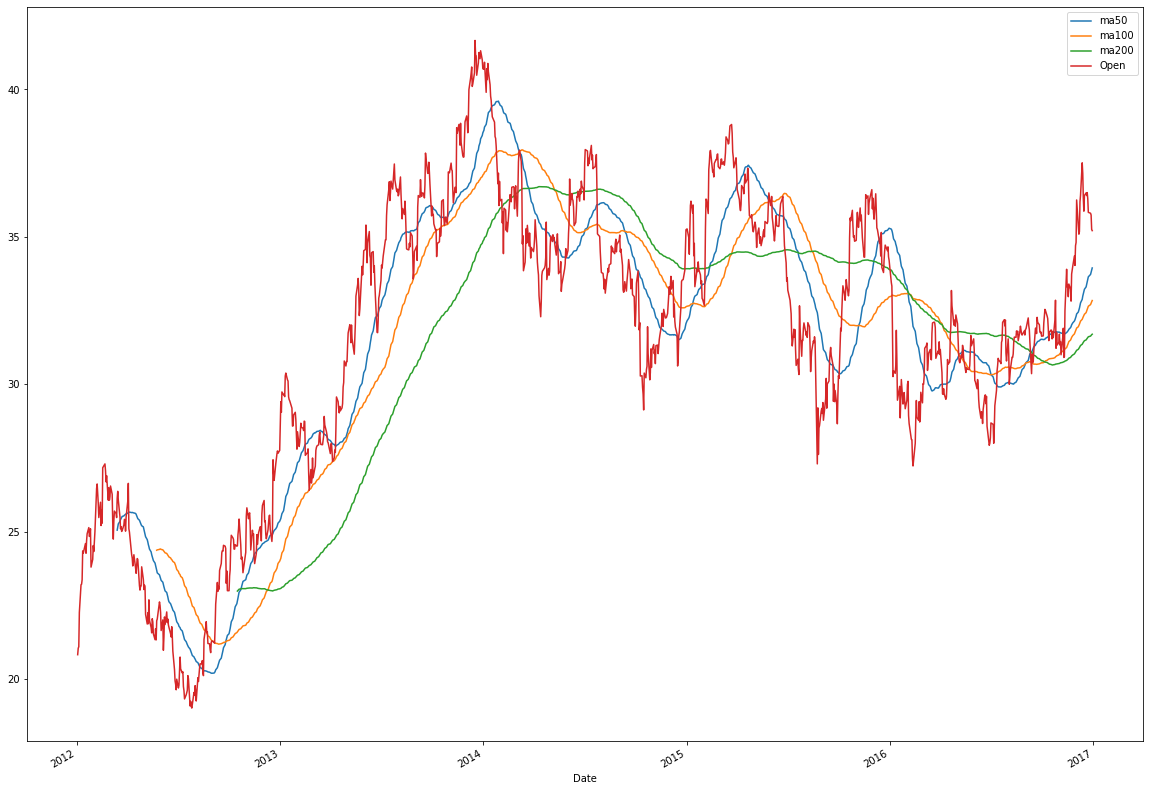

In [ ]:
generalmotors_stock_data["ma50"] = generalmotors_stock_data["Open"].rolling(50).mean()
generalmotors_stock_data["ma100"] = generalmotors_stock_data["Open"].rolling(100).mean()
generalmotors_stock_data["ma200"] = generalmotors_stock_data["Open"].rolling(200).mean()
generalmotors_stock_data[["ma50","ma100","ma200","Open"]].plot(figsize = (20,15))
plt.legend();

Plotting the opening prices of the car companies against each other.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03e92fab00>,
      dtype=object)

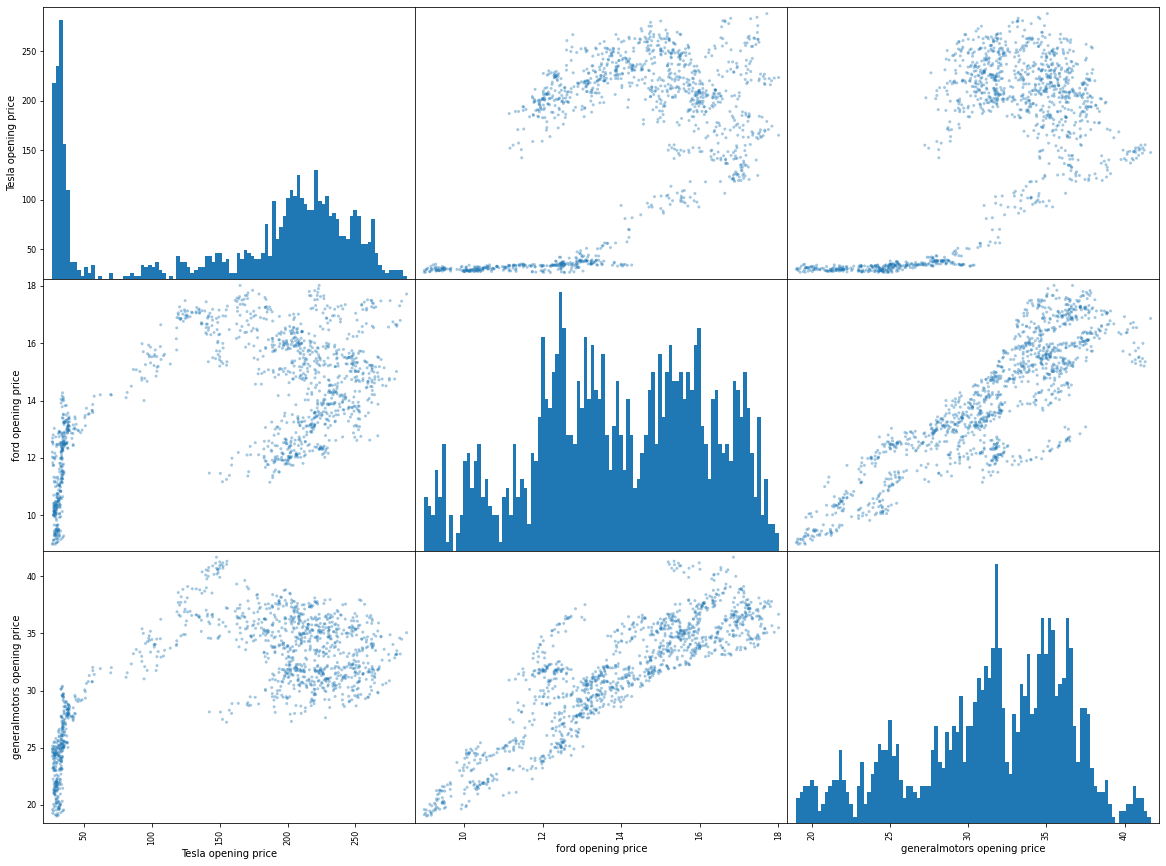

In [ ]:
from pandas.plotting import scatter_matrix
comp = pd.concat([tesla_stock_data["Open"],ford_stock_data["Open"],generalmotors_stock_data["Open"]],axis = 1)
#As we have Open name of each column so changing it according to companies
comp.columns = ["Tesla opening price","ford opening price","generalmotors opening price"]
scatter_matrix(comp,figsize = (20,15),alpha = 0.4,hist_kwds = {"bins":100})

From the above plot we can see that there is a good positive correlation between ford and general motors but the behaviour of tesla is different as comapred to others because there is huge jump in tesla stock price on the other hand ford and general motors remained at same level in comparision.

candle stick chart.

In [ ]:
pip install mplfinance

     |████████████████████████████████| 51kB 1.6MB/s 


In [ ]:
 from mplfinance.original_flavor import candlestick_ohlc #ohlc is open high low close
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

In [ ]:
ford_stock_spec = ford_stock_data.loc["2012-01"].reset_index()
tesla_stock_spec = tesla_stock_data.loc["2012-01"].reset_index()
generalmotors_stock_spec = generalmotors_stock_data.loc["2012-01"].reset_index()

In [ ]:
ford_stock_spec["Date1f"] = ford_stock_spec["Date"].apply(lambda date: date2num(date))
tesla_stock_spec["Date1t"] = tesla_stock_spec["Date"].apply(lambda date: date2num(date))
generalmotors_stock_spec["Date1g"] = generalmotors_stock_spec["Date"].apply(lambda date: date2num(date))

In [ ]:
ford_stock_spec = ford_stock_spec.drop(["ma50","ma100","ma200"],axis = 1)
ford_values = [tuple(vals) for vals in ford_stock_spec[["Date1f","Open","High","Low","Close"]].values ]

tesla_stock_spec = tesla_stock_spec.drop(["ma50","ma100","ma200"],axis = 1)
tesla_values = [tuple(vals) for vals in tesla_stock_spec[["Date1t","Open","High","Low","Close"]].values ]

generalmotors_stock_spec = generalmotors_stock_spec.drop(["ma50","ma100","ma200"],axis = 1)
generalmotors_values = [tuple(vals) for vals in generalmotors_stock_spec[["Date1g","Open","High","Low","Close"]].values ]
#What we gonna have is tuples of the records from the dataframe of columns Date mod,and ohlc

In [ ]:
#Major ticks on mondays
mondays = WeekdayLocator(MONDAY)
#Minor tick on rest of days
alldays = DayLocator()
weekFormatter = DateFormatter("%b %d")
dayFormatter = DateFormatter("%d")

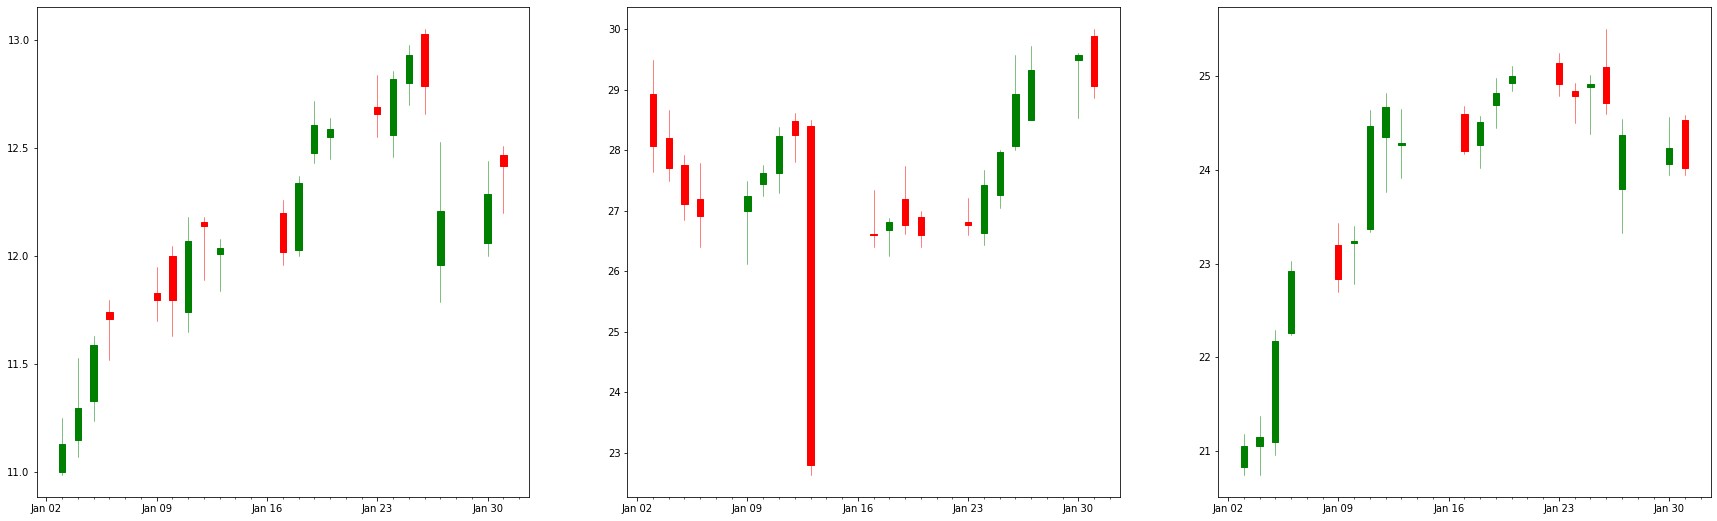

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (30,10))
fig.subplots_adjust(bottom = 0.2)
ax[0].xaxis.set_major_locator(mondays)
ax[0].xaxis.set_minor_locator(alldays)
ax[0].xaxis.set_major_formatter(weekFormatter)

ax[1].xaxis.set_major_locator(mondays)
ax[1].xaxis.set_minor_locator(alldays)
ax[1].xaxis.set_major_formatter(weekFormatter)

ax[2].xaxis.set_major_locator(mondays)
ax[2].xaxis.set_minor_locator(alldays)
ax[2].xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax[0],ford_values,width = 0.4,colorup='g')
candlestick_ohlc(ax[1],tesla_values,width = 0.4,colorup='g')
candlestick_ohlc(ax[2],generalmotors_values,width = 0.4,colorup='g');

Now moving forward to the analysis on basis of daily percent change.

Daily percentage change is basically the price at time t divided by price at time t-1 minus 1(dpc = (price(t)/price(t-1))-1) this is also the returns.

Basically this informs us about the percentage gain or loss if we brought stock on day t and sold it on day t+1.

Now one thing which we can do is calculate the percent returns and plot them with a histogram and see which stock is most stable of the above three.

The more volatile the stock is more is risk(can say more is reward or loss).Volatility can be easily judged by the width of distribution.

In [ ]:
tesla_stock_data["returns"] = (tesla_stock_data["Close"]/tesla_stock_data["Close"].shift(1))-1
ford_stock_data["returns"] = (ford_stock_data["Close"]/ford_stock_data["Close"].shift(1))-1
generalmotors_stock_data["returns"] = (generalmotors_stock_data["Close"]/generalmotors_stock_data["Close"].shift(1))-1
#We can also use pct_chsnge method to calculate the returns

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


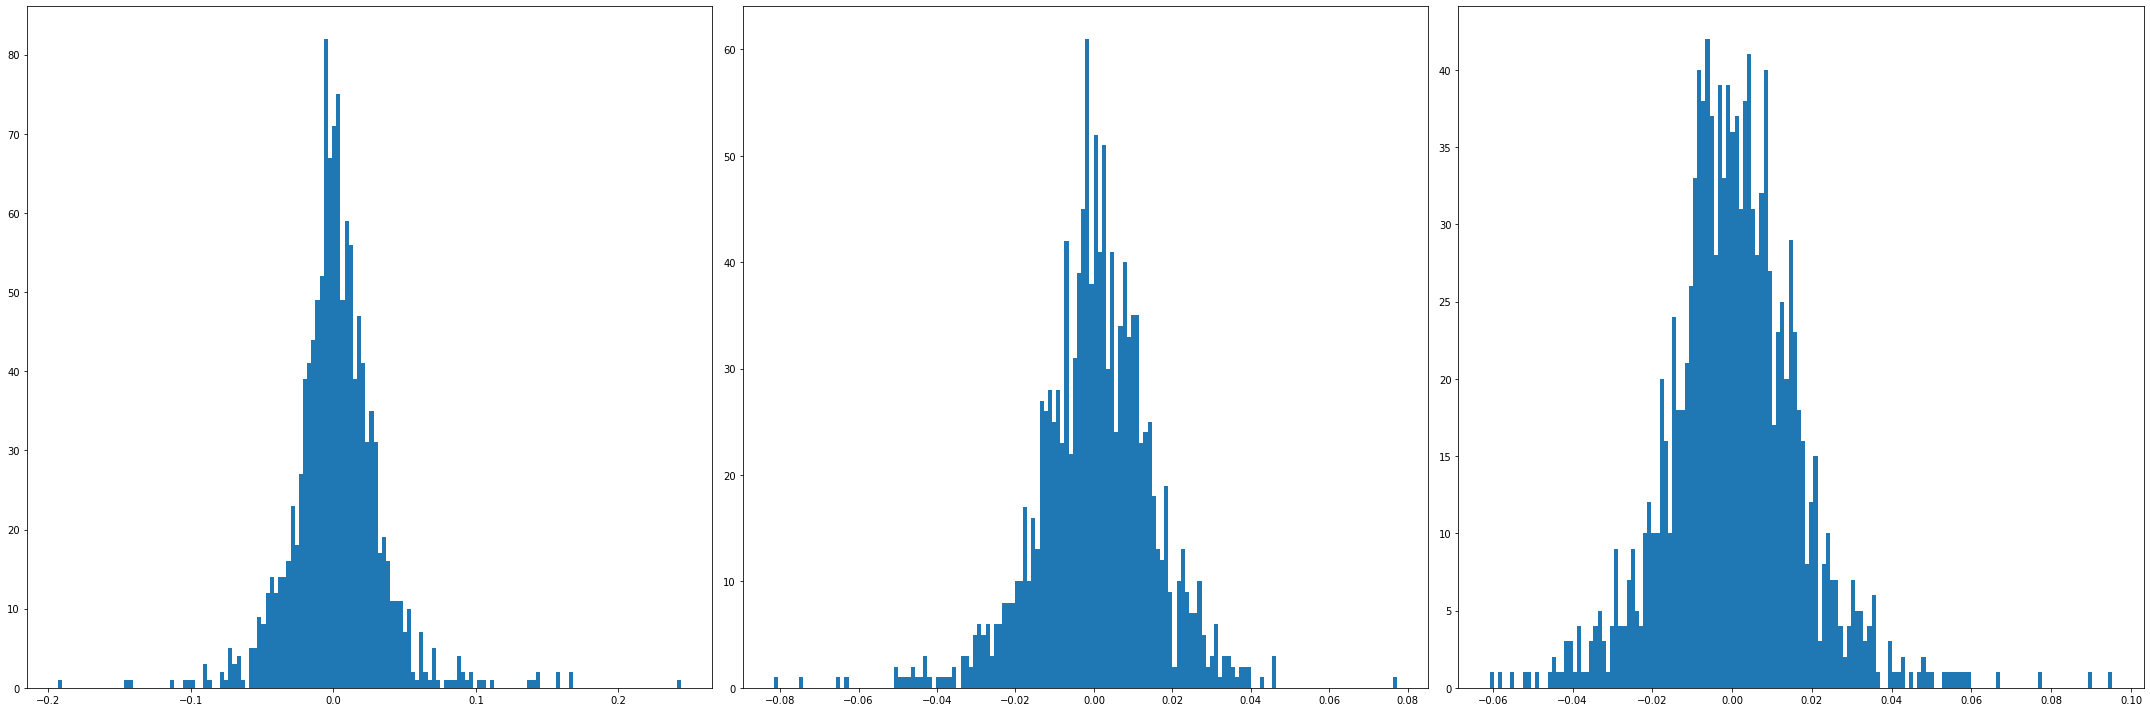

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (30,10))
data = [tesla_stock_data["returns"],ford_stock_data["returns"],generalmotors_stock_data["returns"]]
ax = ax.ravel()
for idx,x in enumerate(ax):
    x.hist(data[idx],bins = 150)
plt.tight_layout();

Also we can plot the histogram above each other to see the comaparative distribution more clearly.

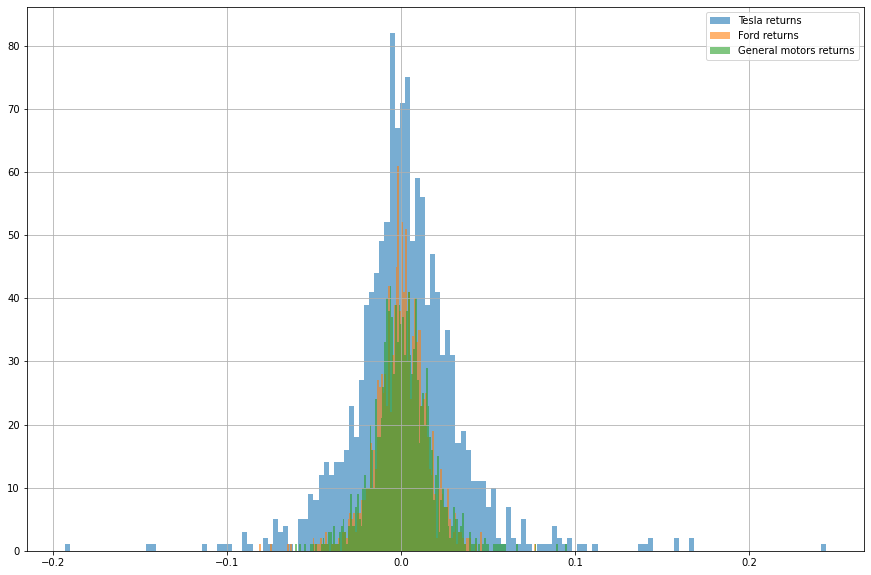

In [ ]:
tesla_stock_data["returns"].hist(bins = 150,label = "Tesla returns",figsize = (15,10),alpha = 0.6)
ford_stock_data["returns"].hist(bins = 150,label = "Ford returns",figsize = (15,10),alpha = 0.6)
generalmotors_stock_data["returns"].hist(bins = 150,label = "General motors returns",figsize = (15,10),alpha = 0.6)
plt.legend();

From the above data we can see that general motors and ford are more stable(ford comparitively more stable).

Tesla has different behaviour and it seems to be having more volatility,larger and wider distribution.

Now we will plot and see the kernel density estimation(kde) and from the kernel density estimation it become easier to figure out the stability.

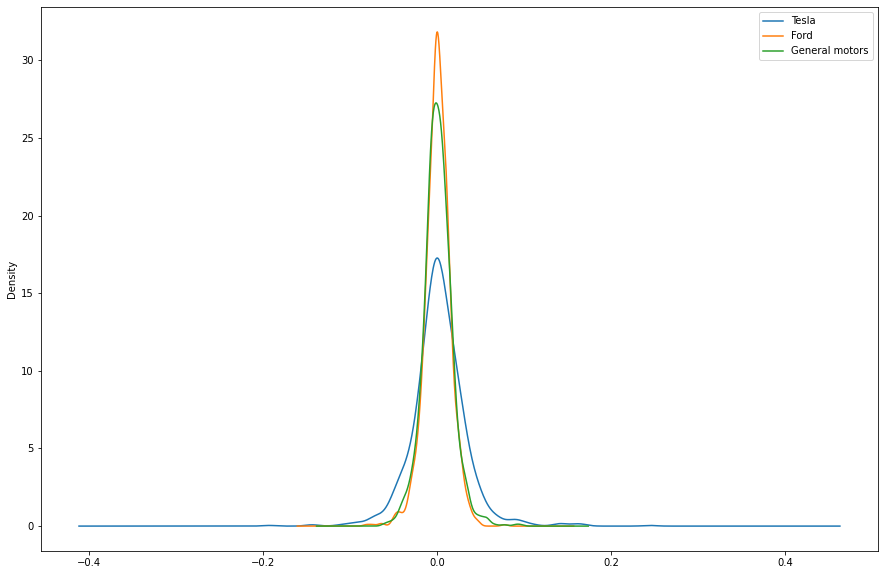

In [ ]:
tesla_stock_data["returns"].plot(kind = "kde",label = "Tesla",figsize = (15,10))
ford_stock_data["returns"].plot(kind = "kde",label = "Ford",figsize = (15,10))
generalmotors_stock_data["returns"].plot(kind = "kde",label = "General motors",figsize = (15,10))
plt.legend();

Wider the plot means more volatility.

Longer the plot center around zero more is the stability. 

From the above plots it is clear that ford is more stable than tesla and general motors(general motors more stable than tesla).

Comparing the returns using box plot.

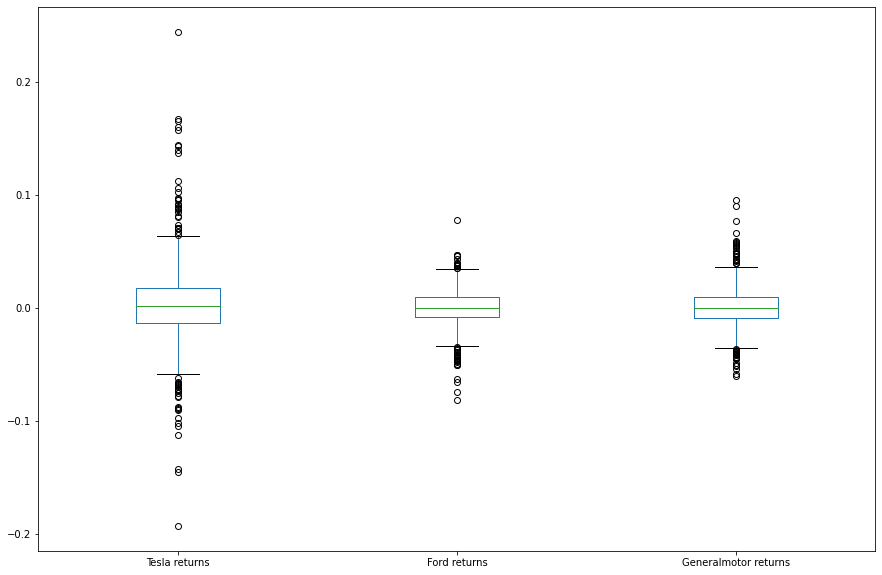

In [ ]:
box_df = pd.concat([tesla_stock_data["returns"],ford_stock_data["returns"],generalmotors_stock_data["returns"]],axis = 1)
box_df.columns = ["Tesla returns","Ford returns","Generalmotor returns"]
box_df.plot(kind = "box",figsize = (15,10))

From the box plot we can validate the above results given by the kernel density estimation as we acn easily see that tesla returns are more widely distributed compared to ford and general motors.

We can also use scatter plot to see the correlation between the daily returns of stocks of Tesla,Ford and Generalmotors.This help us in estimating how related the companies are!

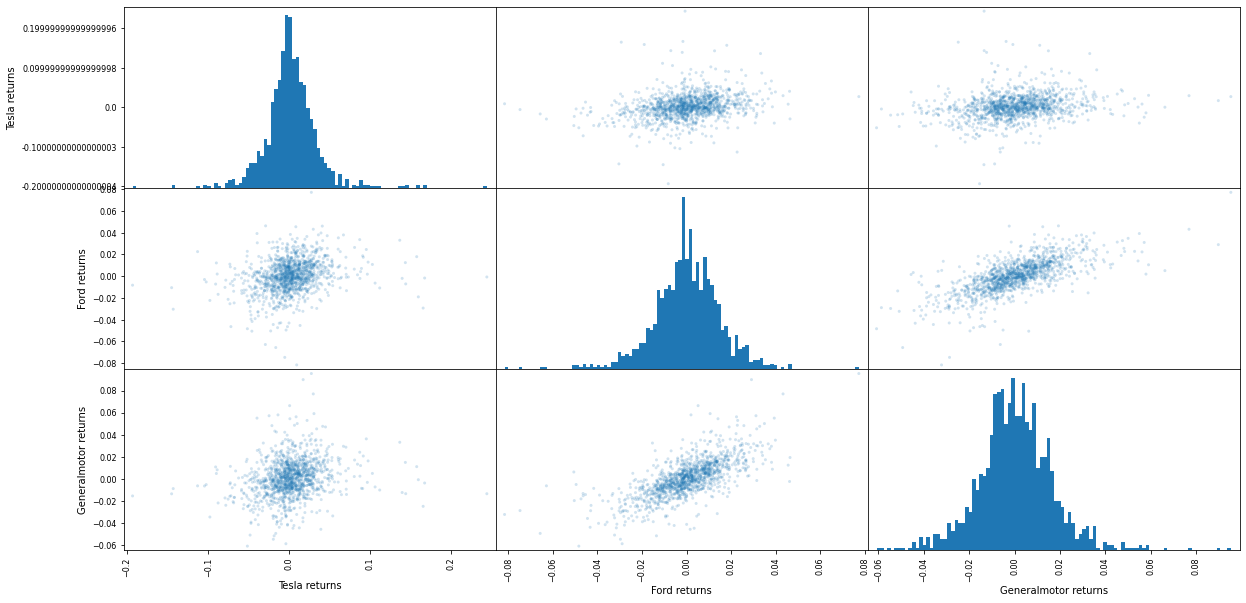

In [ ]:
scatter_matrix(box_df,figsize = (20,10),alpha = 0.2,hist_kwds = {"bins":100});

From the plot we can infer that ford and general motors seems to be more correlated while on the otherhand tesla seems not to be correlated. 

Finding the stocks that tend to be correlated to each other(as ford and general motors here) is really where the domain of algorithmic trading starts.

As previously we have seen that daily returns are useful but they don't give us insight of the profit or loss till the current date(specially in a case if stocks are very volatile).

While cumulative returns are made relative to the day investment in stock is made.

If cumulative return greater than we are making profit and if less than one we are making loss.

Cumulative_daily_return(t) = (1+return(t))*Cumulative_daily_return(t-1)

In [ ]:
tesla_stock_data["Cumulative returns"] = (1+tesla_stock_data["returns"]).cumprod()#cumprod is basically the cumulative product
ford_stock_data["Cumulative returns"] = (1+ford_stock_data["returns"]).cumprod()
generalmotors_stock_data["Cumulative returns"] = (1+generalmotors_stock_data["returns"]).cumprod()

In [ ]:
tesla_stock_data.drop(["ma50","ma100","ma200"],axis = 1).head(10)

,High,Low,Open,Close,Volume,Adj Close,Total money traded,returns,Cumulative returns
Date,,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177,0.986823
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292,0.965812
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743,0.958333
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635,0.970442
2012-01-10,27.760000,27.250000,27.440001,27.620001,671800,27.620001,1.843419e+07,0.013578,0.983618
2012-01-11,28.379999,27.299999,27.620001,28.230000,672300,28.230000,1.856893e+07,0.022085,1.005342
2012-01-12,28.620001,27.809999,28.480000,28.250000,729300,28.250000,2.077046e+07,0.000708,1.006054
2012-01-13,28.500000,22.639999,28.400000,22.790001,5500400,22.790001,1.562114e+08,-0.193274,0.811610


Cumulative returns are actually helpful in scenario is someone is thinking of cashout as he can see whether he is in profit or loss and accordingly take decision. 

Now what we gonna do is plot the cululative returns to see which gave highest and which gave lowest returns.

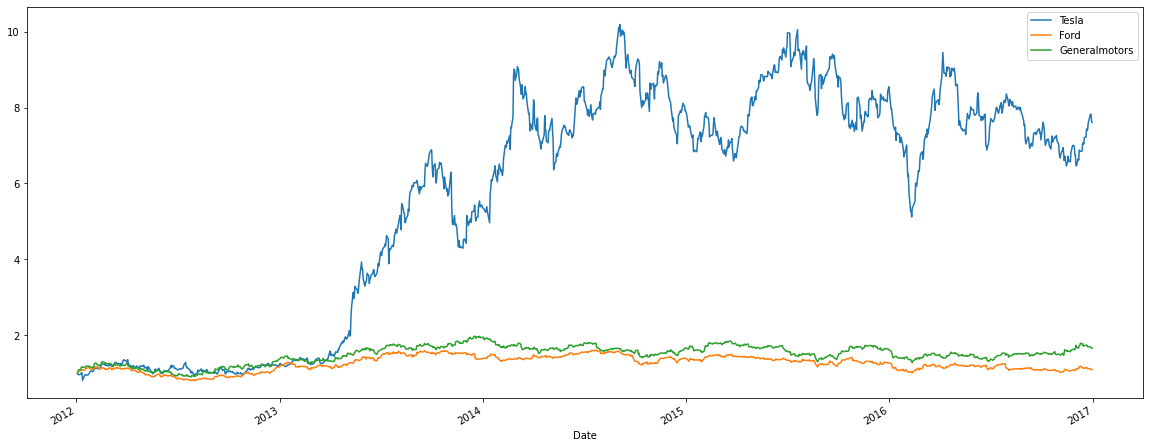

In [ ]:
tesla_stock_data["Cumulative returns"].plot(label = "Tesla",figsize = (20,8))
ford_stock_data["Cumulative returns"].plot(label = "Ford")
generalmotors_stock_data["Cumulative returns"].plot(label = "Generalmotors")
plt.legend();

From the above plot we can see that tesla has highest returns and also ford has little bit lesser cumulative returns than general motors.